This is currently under construction.

This notebook contains the functions that are called inside the rubix pipeline.

# Config

contains all the information needed to run the pipeline. Those are run specfic configurations.

In [4]:
import os
ILLUSTRIS_API_KEY = "05add2d69d501eb62014faa4dadb1af0"

In [5]:
import os
config = {
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        "overwrite": True
        },
        "subset": {
            "use_subset": True,
            "subset_size": 1000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE"},
        
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1}

        
}

In [6]:
# NBVAL_SKIP
from rubix.core.data import convert_to_rubix, prepare_input

convert_to_rubix(config) # Convert the config to rubix format and store in output_path folder
#for gas and stars
#coords, vel, metalicity, mass, age, halfmass_r, gas_coords, gas_vel, gas_metallicity, gas_mass, gas_density, gas_sfr, gas_internal_energy, gas_electron_abundance = prepare_input(config) # Prepare the input for the pipeline
#for gas only
#gas_coords, gas_vel, gas_metallicity, gas_mass, gas_density, gas_hsml, gas_sfr, gas_internal_energy, gas_electron_abundance, gas_metals, halfmass_r = prepare_input(config) # Prepare the input for the pipeline
#for stars only
#
#coords, vel, metalicity, mass, age, halfmass_r = prepare_input(config) # Prepare the input for the pipeline
rubixdata = prepare_input(config) # Prepare the input for the pipeline
print(prepare_input(config))

2024-06-24 15:04:58,653 - rubix - INFO - Loading data from IllustrisAPI
2024-06-24 15:04:58,656 - rubix - INFO - Found existing file galaxy-id-11.hdf5, but overwrite is set to True. Overwriting the file.
2024-06-24 15:04:58,657 - rubix - DEBUG - Loading galaxy with ID 11
2024-06-24 15:04:58,657 - rubix - DEBUG - Creating Url for stars
2024-06-24 15:04:58,658 - rubix - DEBUG - Fields for stars: ['Coordinates', 'GFM_InitialMass', 'GFM_Metallicity', 'GFM_StellarFormationTime', 'Velocities']
2024-06-24 15:04:58,659 - rubix - DEBUG - Creating Url for gas
2024-06-24 15:04:58,659 - rubix - DEBUG - Fields for gas: ['Coordinates', 'Density', 'Masses', 'GFM_Metallicity', 'StarFormationRate', 'InternalEnergy', 'Velocities', 'ElectronAbundance']
2024-06-24 15:04:58,660 - rubix - DEBUG - Downloading Data from http://www.tng-project.org/api/TNG50-1/snapshots/99/subhalos/11/cutout.hdf5?stars=Coordinates,GFM_InitialMass,GFM_Metallicity,GFM_StellarFormationTime,Velocities&gas=Coordinates,Density,Masses

KeyError: "Unable to synchronously open object (object 'Coordinates' doesn't exist)"

In [9]:
print(rubixdata.galaxy.center[0])
print(rubixdata.stars.velocity)

10410.084080942019
[[-1.5355250e-15 -4.5847776e-15 -4.9232096e-16]
 [ 1.4683807e-15  2.7118653e-15 -5.5884811e-15]
 [ 4.7336800e-15 -1.3261995e-17 -4.2374483e-15]
 ...
 [ 1.7550438e-15 -4.2094268e-15 -1.7362481e-17]
 [-1.4768257e-15 -2.2087672e-15  4.3089320e-15]
 [ 5.0407778e-16 -3.4783628e-15  4.1021882e-15]]


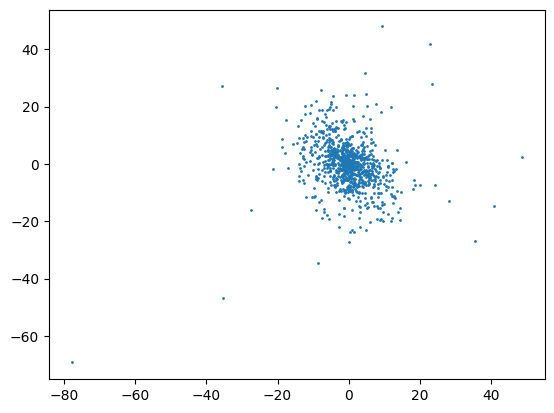

In [6]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
# Make a scatter plot 
n_subset = 10000
subset = rubixdata.stars.coords[:n_subset]

plt.scatter(subset[:,0], subset[:,1], s=1)

#print(rubixdata.stars.coordinates)


Get the function that does the binning

In [6]:
# NBVAL_SKIP
from rubix.core.telescope import get_spatial_bin_edges,get_spaxel_assignment

In [15]:
# NBVAL_SKIP
bin_particles = get_spaxel_assignment(config)
edges = get_spatial_bin_edges(config)

/home/annalena/rubix/rubix/telescope/factory.py:20: UserWarning: No telescope config provided, using default stored in /home/annalena/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(


In [16]:
# NBVAL_SKIP
# Make a scatter plot of the spaxels
spaxel_index = bin_particles(coords)

print("Shape of spaxel_index", spaxel_index.shape)

Shape of spaxel_index (1000,)


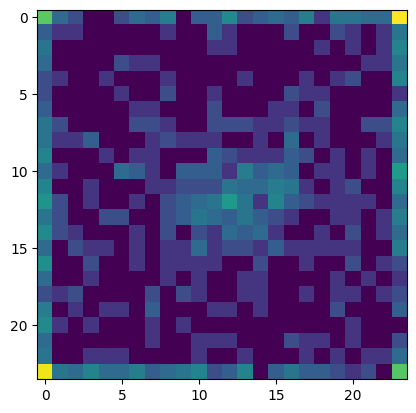

In [17]:
# NBVAL_SKIP
# Calculate binned image


spatial_bin_edges = edges
pixel_assignments = spaxel_index
import numpy as np
image = np.zeros((len(spatial_bin_edges) - 1, len(spatial_bin_edges) - 1))

# Count the number of particles in each pixel
for i in range(len(spatial_bin_edges) - 1):
    for j in range(len(spatial_bin_edges) - 1):
        image[i, j] = np.sum(pixel_assignments == (i + (len(spatial_bin_edges) - 1) * j))

image = np.log10(image + 1)
plt.imshow(image, cmap="viridis")